In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading our dataset
data = pd.read_csv("C:/Users/Faith/Desktop/Temp/Data Sales.csv")
data.head(5)

,Sales Person,Geography,Product,Units Sold in Dec 22,Units Sold in Jan 23,Units Sold in Feb 23,Units Sold in March 23,Price Per Unit,Revenue Dec 22,Revenue Jan 23,Revenue Feb 23,Revenue March 23
0,Shaniqua Advani,Homa Bay,Mint Chip Choco,405,736,2906,1011,"1,904",771120,1401344,5533024,1924944
1,Barr Kanywira,Lokitaung,White Choc,462,745,2268,961,"1,785",824670,1329825,4048380,1715385
2,Mahamud Augar,Olootikoshoi,Orange Choco,492,653,2154,661,"8,463",4163796,5526339,18229302,5594043
3,Shaniqua Advani,Olootikoshoi,Baker's Choco Chips,456,787,2068,1044,"8,008",3651648,6302296,16560544,8360352
4,Gunar Wambua,Olootikoshoi,Caramel Stuffed Bars,312,551,2054,1023,"3,689",1150968,2032639,7577206,3773847


In [3]:
#Summary statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Units Sold in Dec 22,150.0,1.582200e+02,1.270329e+02,6.0,54.00,138.0,222.75,525.0
Units Sold in Jan 23,150.0,2.401467e+02,2.021711e+02,8.0,87.00,195.0,330.75,1004.0
Units Sold in Feb 23,150.0,5.289667e+02,5.420205e+02,8.0,133.25,320.5,794.75,2906.0
Units Sold in March 23,150.0,5.922200e+02,2.766018e+02,53.0,367.25,587.5,831.50,1049.0
Revenue Dec 22,150.0,7.028321e+05,9.357330e+05,2856.0,130866.75,319095.0,866166.00,5291790.0
Revenue Jan 23,150.0,1.079163e+06,1.536510e+06,3976.0,170782.50,468261.5,1383464.25,10349430.0
Revenue Feb 23,150.0,2.223446e+06,3.101722e+06,3416.0,277667.25,995564.5,3045085.75,18229302.0
Revenue March 23,150.0,2.490476e+06,2.363005e+06,14490.0,708109.50,1594813.5,3773421.75,10505530.0


In [4]:
#Checking our data types
data.dtypes

Sales Person              object
Geography                 object
Product                   object
Units Sold in Dec 22       int64
Units Sold in Jan 23       int64
Units Sold in Feb 23       int64
Units Sold in March 23     int64
Price Per Unit            object
Revenue Dec 22             int64
Revenue Jan 23             int64
Revenue Feb 23             int64
Revenue March 23           int64
dtype: object

In [5]:
#Checking if our dataset has any null values
data.isnull().sum()

Sales Person              0
Geography                 0
Product                   0
Units Sold in Dec 22      0
Units Sold in Jan 23      0
Units Sold in Feb 23      0
Units Sold in March 23    0
Price Per Unit            0
Revenue Dec 22            0
Revenue Jan 23            0
Revenue Feb 23            0
Revenue March 23          0
dtype: int64

In [6]:
#Checking for duplicates in our dataset
data.duplicated().sum()

0

In [7]:
#1. For the Months of December 22 to March 23, find the total revenue per month.

# Extract month-wise columns
Dec_22 = data['Revenue Dec 22']
Jan_23 = data['Revenue Jan 23']
Feb_23 = data['Revenue Feb 23']
Mar_23 = data['Revenue March 23']

# Calculate total revenue per month
total_dec_22 = Dec_22.sum()
total_jan_23 = Jan_23.sum()
total_feb_23 = Feb_23.sum()
total_mar_23 = Mar_23.sum()

# Print the results
print(f'Total Revenue for December 22: {total_dec_22}')
print(f'Total Revenue for January 23: {total_jan_23}')
print(f'Total Revenue for February 23: {total_feb_23}')
print(f'Total Revenue for March 23: {total_mar_23}')

Total Revenue for December 22: 105424809
Total Revenue for January 23: 161874426
Total Revenue for February 23: 333516834
Total Revenue for March 23: 373571387


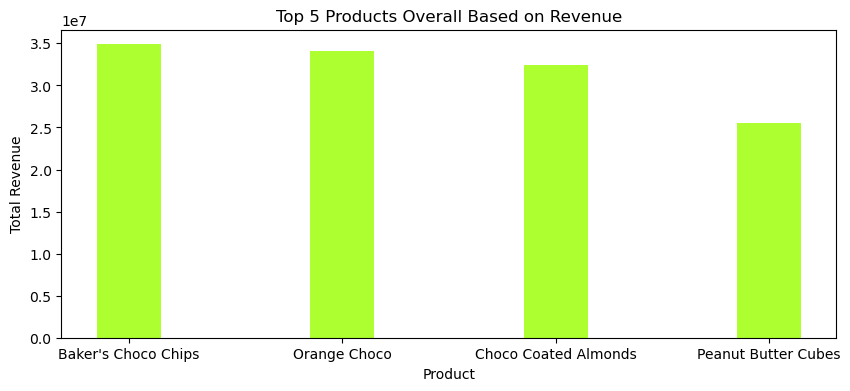

In [8]:
#2. What are the top 5 products overall based on revenue?

# Calculate total revenue for each product across all months
data['total_revenue'] = data[['Revenue Dec 22', 'Revenue Jan 23', 'Revenue Feb 23', 'Revenue March 23']].sum(axis=1)

# Sort products based on total revenue in descending order
sorted_products = data.sort_values(by='total_revenue', ascending=False)

# Select the top 5 products
top_5_products = sorted_products.head(5)

# Plot the results
plt.figure(figsize=(10, 4))
plt.bar(top_5_products['Product'], top_5_products['total_revenue'], color='greenyellow', width = 0.3)
plt.title('Top 5 Products Overall Based on Revenue')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.show()

In [9]:
#3. What are the top 5 products based on both geographical area and sales volume in March 23?

# We first filter data for March 23
df_mar_23 = data[data['Revenue March 23'].notna()]

# Group by both 'geographical_area' and 'product' and sum the revenue
grouped_df = df_mar_23.groupby(['Geography', 'Product'])['Revenue March 23'].sum().reset_index()

# Sort by sales volume in descending order
sorted_df = grouped_df.sort_values(by='Revenue March 23', ascending=False)

# Get the top 5 products for each geographical area
top_5_products_per_area = sorted_df.groupby('Geography').head(5)

# Display the results
print(top_5_products_per_area)

       Geography                    Product  Revenue March 23
84  Olootikoshoi               Orange Choco          17078593
77  Olootikoshoi        Baker's Choco Chips          12747056
64       Mandera       Choco Coated Almonds          12618662
45  Mahandaakini       Caramel Stuffed Bars          11248552
35       Machuom  ManLokitaunga Honey Choco          11114397
7       Homa Bay                    Eclairs           9986417
32       Machuom              Drinking Coco           9882432
37       Machuom            Mint Chip Choco           9787218
39       Machuom        Peanut Butter Cubes           9302944
31       Machuom       Choco Coated Almonds           8672230
79  Olootikoshoi       Choco Coated Almonds           8560006
78  Olootikoshoi       Caramel Stuffed Bars           8316140
26     Lokitaung         Smooth Sliky Salty           7743190
3       Homa Bay            99% Dark & Pure           7470946
70       Mandera        Peanut Butter Cubes           7414484
80  Oloo

In [10]:
#4. What are the bottom 5 products based on sales revenue, overall? 
# Sort by sales volume in descending order
sorted_df = grouped_df.sort_values(by='Revenue March 23', ascending=True)

# Get the top 5 products for each geographical area
bottom_5_products_per_area = sorted_df.groupby('Geography').head(5)

# Display the results
print(bottom_5_products_per_area)

       Geography                    Product  Revenue March 23
62       Mandera        Baker's Choco Chips             39396
75  Olootikoshoi                After Nines             84672
29       Machuom        Baker's Choco Chips             97216
5       Homa Bay               Almond Choco            130536
40       Machuom        Spicy Special Slims            149597
4       Homa Bay                After Nines            172494
83  Olootikoshoi                  Milk Bars            255780
72       Mandera        Spicy Special Slims            294840
59       Mandera            99% Dark & Pure            322399
68       Mandera               Orange Choco            448098
76  Olootikoshoi               Almond Choco            470400
87  Olootikoshoi            Raspberry Choco            477302
53  Mahandaakini         Smooth Sliky Salty            533519
52  Mahandaakini        Peanut Butter Cubes            700070
51  Mahandaakini        Organic Choco Syrup            807408
9       

In [11]:
#5. What are the bottom 5 products based on both geographical area and sales volume, overall?

# Group by both 'geographical_area' and 'product' and sum the revenue
grouped_df = df_mar_23.groupby(['Geography', 'Product'])['Revenue March 23'].sum().reset_index()

# Sort by sales volume in ascending order
sorted_df = grouped_df.sort_values(by='Revenue March 23', ascending=True)

# Get the bottom 5 products overall
bottom_5_products_overall = sorted_df.head(5)

# Display the results
print(bottom_5_products_overall)

       Geography              Product  Revenue March 23
62       Mandera  Baker's Choco Chips             39396
75  Olootikoshoi          After Nines             84672
29       Machuom  Baker's Choco Chips             97216
5       Homa Bay         Almond Choco            130536
40       Machuom  Spicy Special Slims            149597


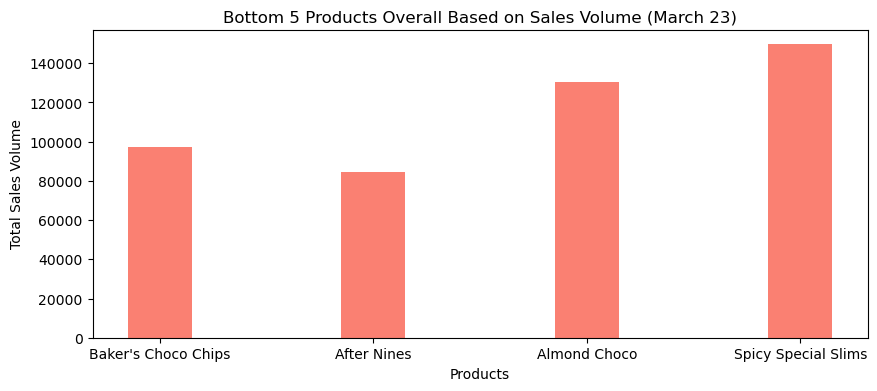

In [12]:
# Plot the results
plt.figure(figsize=(10, 4))
plt.bar(bottom_5_products_overall['Product'], bottom_5_products_overall['Revenue March 23'], color='salmon', width = 0.3)
plt.title('Bottom 5 Products Overall Based on Sales Volume (March 23)')
plt.xlabel('Products')
plt.ylabel('Total Sales Volume')
plt.show()